In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/My Drive/3 курс/NN/data/Result.txt'

In [4]:
actual = []
probability = []
expected = []
loss = []
accuracy = []
precision = []
recall = []
with open(data_path) as fp:
    accuracy = fp.readline()
    precision = fp.readline().split()
    recall = fp.readline().split()
    loss = fp.readline().split()
    line = fp.readline()
    while line:
        s = line.split()
        expected.append(float(s[0]))
        actual.append(float(s[1]))
        line = fp.readline()

        line = line.replace(',', '.').split()
        prob = []
        for i in line:
            prob.append(float(i))
        probability.append(prob)
        line = fp.readline()

In [5]:
df = pd.DataFrame()
df['precision'] = precision
df['recall'] = recall

## Loss History

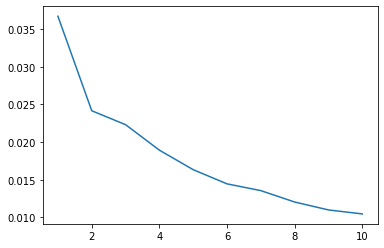

In [6]:
x = np.arange(1, len(loss) + 1)
for i in range(len(loss)):
  loss[i] = float(loss[i].replace(",", "."))
plt.plot(x, loss)

## Accuracy

In [8]:
float(accuracy.replace(",", "."))

0.929619047619048

## Precision

In [9]:
df['precision']

0    0,963636363636364
1    0,947764312578354
2    0,930966469428008
3    0,912883998165979
4      0,9227761485826
5    0,920711974110032
6      0,9476490547746
7    0,901916058394161
8    0,913989125061789
9    0,931924882629108
Name: precision, dtype: object

## Recall

In [10]:
df['recall']

0    0,974358974358974
1    0,988666085440279
2    0,920975609756098
3    0,912883998165979
4    0,945891783567134
5    0,924702058504875
6    0,970705064548163
7     0,95924308588064
8    0,867667761614266
9    0,841101694915254
Name: recall, dtype: object

## ROC кривые

In [11]:
probability = np.array(probability)

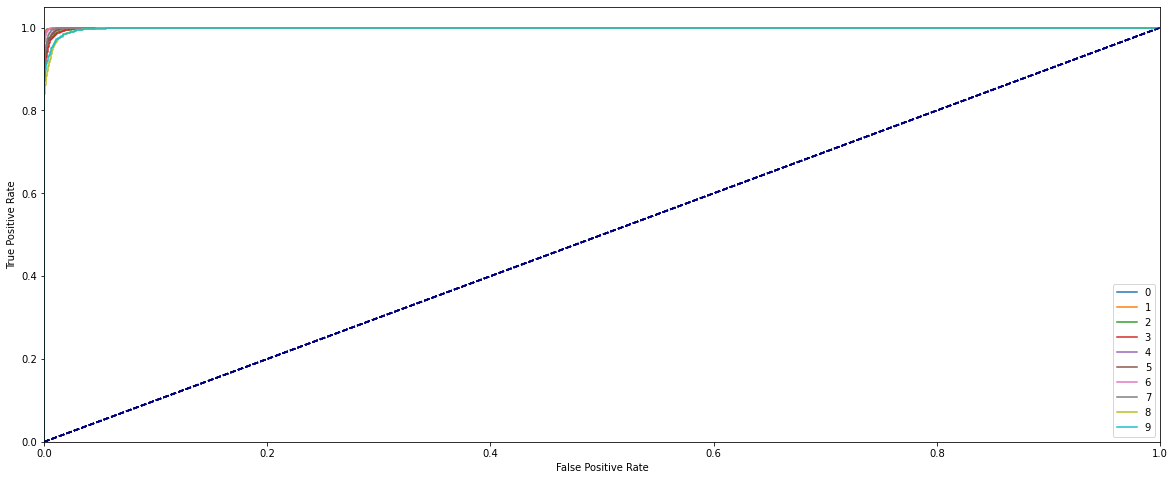

In [16]:
plt.figure(figsize=(20, 8))
for k in range(10):
    y = []
    prob = []
    for i in range(len(actual)):
        if actual[i] == k:
            y.append(1)
        else:
            y.append(0)
        prob = probability[:, k]
    fpr, tpr, treshold = roc_curve(y, prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label = f'{k}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()